In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS

sns.set()

a = np.array([0, 0])
b = np.array([0.5, 0.5])
c = np.array([1, 1])
d = np.array([1, np.nan])


pairwise_distances(a.reshape(1, -1), b.reshape(1, -1), ensure_all_finite=True)

array([[0.70710678]])

In [2]:
pairwise_distances(a.reshape(1, -1), c.reshape(1, -1))

array([[1.41421356]])

In [3]:
pairwise_distances(a.reshape(1, -1), b.reshape(1, -1), metric="cosine")

array([[1.]])

In [4]:
pairwise_distances(a.reshape(1, -1), c.reshape(1, -1), metric="cosine")

array([[1.]])

In [5]:
# {'cityblock', 'jaccard', 'cosine', 'braycurtis', 'sokalmichener', 'correlation', 'l1', 'russellrao', 'minkowski', 'rogerstanimoto', 'wminkowski', 'chebyshev', 'nan_euclidean', 'l2', 'sokalsneath', 'mahalanobis', 'dice', 'haversine', 'precomputed', 'seuclidean', 'canberra', 'matching', 'sqeuclidean', 'hamming', 'yule', 'manhattan', 'euclidean'}
pairwise_distances(a.reshape(1, -1), d.reshape(1, -1), metric="nan_euclidean")

array([[1.41421356]])

In [6]:
PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

## Pearson correlation

**Disadvantages of Pearson Correlation:**

1. **Linearity assumption**: Pearson correlation assumes a linear relationship between two variables, which may not always be the case in real-world data.
2. **Normality requirement**: Pearson correlation requires normality of both variables, which can be problematic if the data is skewed or has outliers.
3. **Assumes equal variances**: Pearson correlation assumes that the variances of both variables are equal, which may not be true in all cases.
4. **Sensitive to outliers**: Pearson correlation can be heavily influenced by outliers, which can lead to biased results.
5. **Limited interpretability**: The result of a Pearson correlation coefficient does not provide direct insights into the nature of the relationship between the two variables.

**Better Alternatives for Similarity Calculation:**

1. **Kendall's Tau (K)**: Kendall's Tau is a non-parametric measure that ranks both variables and calculates the proportion of concordant pairs. It is less sensitive to outliers and does not require normality.
2. **Spearman's Rank Correlation Coefficient**: Similar to Kendall's Tau, Spearman's coefficient also uses ranking but has a different interpretation. It measures the number of agreements between rankings rather than concordance.
3. **Mutual Information (MI)**: Mutual Information is a measure that calculates the mutual dependence between two variables. It is robust to outliers and does not require normality.
4. **Cosine Similarity**: Cosine similarity uses vector space methods, such as cosine distance, to calculate similarities between vectors representing data points. This method is particularly useful for high-dimensional data.
5. **Distance-based metrics**: Metrics like Euclidean Distance, Mahalanobis Distance, or Minkowski Distance can be used to measure similarities between data points.

**When to use each alternative:**

* Use Pearson correlation when the relationship is expected to be linear and both variables are normally distributed.
* Use Kendall's Tau or Spearman's coefficient when the relationship is non-linear or the data has outliers.
* Use Mutual Information when the relationships are complex or non-linear, and you want to measure mutual dependence.
* Use Cosine Similarity when working with high-dimensional data or when you want to leverage vector space methods.
* Use Distance-based metrics when you need a metric that accounts for both magnitude and direction of differences between data points.

In summary, while Pearson correlation is still widely used, it has limitations. The choice of alternative depends on the nature of your data, the type of relationship you're trying to capture, and the characteristics of your dataset.



In [7]:
df = pd.read_csv("rating2.csv")
df.head()

,users,movies,ratings
0,Lisa Rose,Lady in the Water,2.5
1,Lisa Rose,Snakes on a Plane,3.5
2,Lisa Rose,Just My Luck,3.0
3,Lisa Rose,Superman Returns,3.5
4,Lisa Rose,"You, Me and Dupree",2.5


In [8]:
user_items = df.pivot(index="users", columns="movies", values="ratings")
user_items

movies,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
users,,,,,,
Claudia Puig,3.0,NaN,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Michael Phillips,NaN,2.5,3.0,3.5,4.0,NaN
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,NaN,NaN,4.5,4.0,NaN,1.0


In [9]:
# .corr returns the pearson correlation between columns.
# To find user-user similarity scores, we transpose the user_items DataFrame.
recommendations = user_items.T.corr(
    method="pearson"
)  # "pearson", "kendall", "spearman"
recommendations

users,Claudia Puig,Gene Seymour,Jack Matthews,Lisa Rose,Michael Phillips,Mick LaSalle,Toby
users,,,,,,,
Claudia Puig,1.000000,0.314970,0.028571,0.566947,1.000000,0.566947,0.893405
Gene Seymour,0.314970,1.000000,0.963796,0.396059,0.204598,0.411765,0.381246
Jack Matthews,0.028571,0.963796,1.000000,0.747018,0.134840,0.211289,0.662849
Lisa Rose,0.566947,0.396059,0.747018,1.000000,0.404520,0.594089,0.991241
Michael Phillips,1.000000,0.204598,0.134840,0.404520,1.000000,-0.258199,-1.000000
Mick LaSalle,0.566947,0.411765,0.211289,0.594089,-0.258199,1.000000,0.924473
Toby,0.893405,0.381246,0.662849,0.991241,-1.000000,0.924473,1.000000


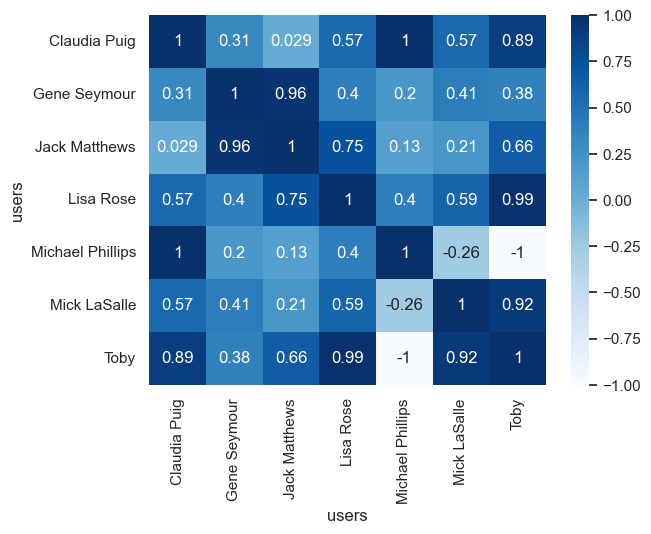

In [10]:
sns.heatmap(recommendations, annot=True, cmap="Blues");

In [11]:
# To find similar users
user = "Claudia Puig"
n = 5

recommendations[user].sort_values(ascending=False).drop(user).head(n)

users
Michael Phillips    1.000000
Toby                0.893405
Lisa Rose           0.566947
Mick LaSalle        0.566947
Gene Seymour        0.314970
Name: Claudia Puig, dtype: float64

The Pearson correlation coefficient is typically written as:

$$\rho = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

where $x_i$ and $y_i$ are the individual data points, $\bar{x}$ and $\bar{y}$ are the means of the respective datasets, and $n$ is the number of data points.



In [12]:
def pearson(a, b):
    # Only computes the correlation if the values exists in both vector.
    mask = pd.notna(a) & pd.notna(b)
    s1 = a[mask] - a[mask].mean()
    s2 = b[mask] - b[mask].mean()

    return (s1 @ s2) / np.sqrt((s1 @ s1) * (s2 @ s2))

In [13]:
pearson(user_items.iloc[0], user_items.iloc[0])

np.float64(1.0)

In [14]:
pearson(user_items.iloc[0], user_items.iloc[1])

np.float64(0.314970394174356)

In [15]:
pearson(user_items.iloc[0], user_items.iloc[4])

np.float64(1.0)